In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
folder = '/content/gdrive/MyDrive/Asignaturas/Modulo 2 Pre-procesamiento de datos/Datos/'

Mounted at /content/gdrive


# Análisis Exploratorio de Datos - Empresa de Telecomunicaciones

En este proyecto final aplicaremos varias de las herramientas aprendidas en este curso y en el curso "Pandas Nivel Básico" para abordar un problema de Análisis Exploratorio de Datos (o EDA por sus siglas en Inglés: *Exploratory Data Analysis*).

> El principal propósito del EDA es entender nuestros datos, las variables que los conforman y las relaciones entre dichas variables a la luz de un problema inicial en donde buscamos extraer información relevante a partir de los datos para la toma de decisiones.

## Contenido

1. [Planteamiento del problema](#sec_1)
2. [Los sets de datos](#sec_2)
3. [Preparación del set de datos](#sec_3)
4. [Análisis exploratorio de los datos](#sec_4)
5. [Reporte final y recomendaciones](#sec_5)

<a id='sec_1'></a>
## 1. Planteamiento del problema

NexaCom es una de las empresas de telecomunicaciones líder en el Reino Unido y en Mayo de 2022 lanzó sus planes con tecnología 5G, al igual que otros competidores.

Sin embargo, los ejecutivos de la empresa han notado una reducción en el número de usuarios activos y en las ganancias obtenidas por la empresa después de este lanzamiento.

Uno de estos ejecutivos solicitó al equipo de análisis de datos analizar los datos disponibles para determinar los posibles motivos de este comportamiento.

### 1.1. Tarea a realizar

Realizar un análisis exploratorio de los datos para tratar de encontrar los motivos detrás de la reducción de usuarios activos y de las ganancias obtenidas por la empresa.

Al final, y con base en el análisis anterior:
- Genere un reporte muy breve con los principales hallazgos
- Dé al menos 3 recomendaciones al equipo ejecutivo para mejorar el número de usuarios activos y las ganancias

<a id='sec_2'></a>
## 2. Los sets de datos

La información no se encuentra almacenada en una única tabla y, por el contrario, está distribuida en múltiples sets de datos (todos en formato CSV).

En esta lección veremos en detalle estos sets de datos y definiremos cuáles de ellos resultarán útiles para el problema que queremos resolver.

### 2.1. *nexacom_ciudades.csv*

Contiene información relacionada con las ciudades donde la empresa ofrece sus servicios:

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

RUTA = folder+'Empresa_telecomunicacion/'
nx_ciudades = pd.read_csv(RUTA + 'nexacom_ciudades.csv')
nx_ciudades

,cod_ciudad,nombre_ciudad
0,400001,London
1,110001,Birmingham
2,700001,Manchester
3,560001,Glasgow
4,600001,Liverpool
5,500001,Edinburgh
6,411001,Leeds
7,380001,Bristol
8,302001,Sheffield
9,226001,Newcastle


Se tienen 15 ciudades en total y por cada una tendremos:

- `cod_ciudad`: código único para cada ciudad
- `nombre_ciudad`: el nombre de la ciudad

### 2.2. *nexacom_fechas.csv*

Contiene información asociada a las fechas de corte para las cuales se recolectaron/consolidaron los datos:

In [12]:
nx_fechas = pd.read_csv(RUTA + 'nexacom_fechas.csv')
nx_fechas

,fecha,mes,Antes de/después de_5g,periodo_tiempo
0,01-Ene-22,Ene,Antes de 5G,1
1,01-Feb-22,Feb,Antes de 5G,2
2,01-Mar-22,Mar,Antes de 5G,3
3,01-Abr-22,Abr,Antes de 5G,4
4,01-Jun-22,Jun,Después de 5G,1
5,01-Jul-22,Jul,Después de 5G,2
6,01-Ago-22,Ago,Después de 5G,3
7,01-Sep-22,Sep,Después de 5G,4


La información fue recolectada y consolidada en los meses de enero a septiembre de 2022 (el primer día), exceptuando el mes de mayo.

Las columnas correspondientes son:

- `fecha`: fecha de recolección/consolidación de los datos
- `mes`: mes de recolección/consolidación de los datos
- `Antes de/despues de_5g`: si la fecha fue antes ("Antes de 5G") o después ("Después de 5G") de la implementación de la tecnología 5G.
- `periodo_tiempo`: secuencia de números entre 1 y 4 usada para indicar comparaciones entre pares de meses antes y después de la implementación del 5G. Ejemplo: 1 - Enero vs. Junio, 2 - Febrero vs. Julio, 3 - Marzo vs. Agosto, 4 - Abril vs. Septiembre)

### 2.3. *nexacom_planes.csv*

Información de los diferentes planes ofrecidos por la empresa a sus usuarios:

In [11]:
nx_planes = pd.read_csv(RUTA + 'nexacom_planes.csv')
nx_planes

,plan,descr_plan
0,p1,Recarga inteligente (2 GB / Día Combo por 3 me...
1,p2,Súper ahorro (1.5 GB / Día Combo por 56 Días)
2,p3,Ahorro Élite (1 GB/ Día válido por 28 Días)
3,p4,Mini datos (500 MB/ Día válido por 20 Días)
4,p5,Todo incluído (voz y datos)
5,p6,Sólo datos (15 GB de datos 28 Días)
6,p7,Combo 25 GB 3G / 4G sólo datos
7,p8,Ahorro diario (1 GB/Día válido por 1 Día)
8,p9,Combo TopUp (voz ilimitada y 300 MB de datos)
9,p10,Súper Combo (6 GB / Día válido por 3 Días)


Se tienen 13 planes en total, cada uno con esta información:

- `plan`: código de identificación del plan
- `descr_plan`: descripción detallada del plan

### 2.4. *nexacom_metricas.csv*

Información relacionada con el número de suscriptores, el número de abandonos y las ganancias obtenidas por la empresa:

In [4]:
nx_metricas = pd.read_csv(RUTA + 'nexacom_metricas.csv')
nx_metricas

,fecha,código_ciudad,compañía,ganancias_100K,ganancia_prom_usuario,usuarios_activos_1K,usuarios_abandonaron_1K
0,01-Ene-22,400001,NexaCom,60.69,192,31.61,1.90
1,01-Ene-22,110001,NexaCom,42.71,175,24.41,1.31
2,01-Ene-22,700001,NexaCom,36.91,175,21.09,1.25
3,01-Ene-22,560001,NexaCom,37.40,175,21.37,1.39
4,01-Ene-22,600001,NexaCom,30.80,203,15.17,1.12
...,...,...,...,...,...,...,...
115,01-Sep-22,800008,NexaCom,11.86,250,4.74,0.38
116,01-Sep-22,641001,NexaCom,8.59,177,4.85,0.53
117,01-Sep-22,160017,NexaCom,10.32,163,6.33,0.63
118,01-Sep-22,122001,NexaCom,6.35,238,2.67,0.21


Se tiene un total de 120 registros (15 ciudades x 8 meses) y por cada uno está disponible esta información:

- `fecha`: fecha de recolección/consolidación de los datos (inicio de cada mes, de enero a septiembre, exceptuando mayo)
- `código_ciudad`: código único para cada ciudad
- `compañía`: nombre de la compañía para la cual se provee la información. En este caso es únicamente NexaCom
- `ganancias_100K`: ganancias que obtuvo la compañía para la fecha de corte y para la ciudad en particular, medidas en cientos de miles de libras (x100.000). Por ejemplo, un valor de 60.69 indica 60.69 x 100.000 = 606'900.000 libras
- `ganancia_prom_usuario`: la ganancia promedio obtenida por cada usuario, medida en libras. Es el resultado de dividir "ganancias_100K" entre "usuarios_activos_1K"
- `usuarios_activos_1K`: número de usuarios activos en la fecha de corte correspondiente (por 1.000)
- `usuarios_abandonaron_1K`: número de usuario que abandonaron el servicio en la fecha de corte correspondiente (por 1.000)

### 2.5. *info_cuota_mercado.csv*

Información relacionada con el valor total del mercado para todas las empresas competidoras:

In [7]:
info_cm = pd.read_csv(RUTA + 'info_cuota_mercado.csv')
print(info_cm.shape)
info_cm.sample(10)

(600, 5)


,fecha,código_ciudad,vr_total_mercado_1M,compañía,cm_pctj
128,01-Ene-22,302001,79.05,Vodafone,18.47
172,01-Abr-22,380001,124.68,Vodafone,28.14
443,01-Jul-22,302001,97.09,VoxLink,11.38
338,01-Ago-22,302001,92.80,Orange,37.51
45,01-Abr-22,400001,324.26,NexaCom,20.12
336,01-Ago-22,411001,164.70,Orange,32.12
176,01-Abr-22,641001,56.90,Vodafone,28.80
402,01-Mar-22,160017,39.07,VoxLink,10.50
20,01-Feb-22,500001,170.66,NexaCom,20.20
258,01-Feb-22,560001,224.30,Orange,32.01


Se tienen en total 600 registros, cada uno con esta información:

- `fecha`: fecha de recolección/consolidación de los datos (inicio de cada mes, de enero a septiembre, exceptuando mayo)
- `código_ciudad`: código único para cada ciudad
- `vr_total_mercado_1M`: valor total del mercado (es decir el monto total de servicios vendidos) a la fecha de corte y para cada ciudad en particular (en libras multiplicadas por 1 millón)
- `compañía`: nombre de la empresa que ofrece el servicio
- `cm_pctj`: porcentaje de la cuota de mercado a la fecha de corte por la respectiva compañía calculado con respecto al valor total del mercado (vr_cuota_mercado_1M) para ese mes y ciudad en particular.

### 2.6. *info_ganancias_por_plan.csv*

Información relacionada con las ganancias obtenidas con cada plan ofrecido por la empresa:

In [8]:
info_gplan = pd.read_csv(RUTA + 'info_ganancias_por_plan.csv')
info_gplan

,fecha,código_ciudad,planes,ganancias_plan_100K
0,01-Ene-22,400001,p1,6.26
1,01-Ene-22,110001,p1,4.58
2,01-Ene-22,700001,p1,4.29
3,01-Ene-22,560001,p1,4.26
4,01-Ene-22,600001,p1,3.60
...,...,...,...,...
1195,01-Sep-22,122001,p12,0.43
1196,01-Sep-22,122001,p13,0.09
1197,01-Sep-22,492001,p11,0.48
1198,01-Sep-22,492001,p12,0.29


En total se tienen 1200 registros y cada uno contiene esta información:

- `fecha`: fecha de recolección/consolidación de los datos (inicio de cada mes, de enero a septiembre, exceptuando mayo)
- `código_ciudad`: código único para cada ciudad
- `planes`: código del plan ofrecido por la empresa a sus usuarios
- `ganancias_plan_100K`: ganancias generadas por el plan para esa fecha de corte y ciudad (en libras multiplicadas por 100.000)

### 2.7. Sets de datos a utilizar

En realidad todos los sets de datos tienen información relevante para el problema, pero esta información está distribuida (no se encuentra centralizada en una sola tabla).

Sin embargo, podemos ver que los sets `nx_metricas`, `info_cm` e `info_gplan` contienen la mayor parte de la información necesaria para realizar el EDA. En particular:

- `nx_metricas`:
    - Contiene información de ganancias, usuarios activos y que abandonaron para nuestra empresa.
    - Debe ser complementada con información proveniente de `nx_fechas` y `nx_ciudades`
    - NO contiene comparativo con otras empresas ni información detallada de las ganancias vs. planes
    
- `info_cm`:
    - Contiene información con respecto a otras compañías en términos de porcentaje de la cuota de mercado, valor total mercado y ciudades
    - Debe ser complementada con información proveniente de `nx_fechas` y `nx_ciudades`

- `info_gplan`:
    - Información detallada de las ganancias generadas por cada plan antes y después de la implementación de la tecnología 5G
    - Debe ser complementada con información proveniente de `nx_fechas` y `nx_ciudades`
    
Estas conclusiones serán claves para la siguiente etapa: la preparación de los datos.

<a id='sec_3'></a>
## 3. Preparación de los datos

En esta fase nos enfocaremos en:

1. Combinar las tablas de datos para centralizar la información en unas cuantas
2. Eliminar columnas irrelevantes y organizar las columnas restantes
3. Realizar el manejo de datos faltantes (si aplica)

Cada una de estas tres fases será implementada tomando como punto de partida los *DataFrames* de referencia: `nx_metricas`, `info_cm` e `info_gplan`. Veamos esto en detalle:

### 3.1. Preparación *DataFrame* `nx_metricas`

Recordemos este *DataFrame*:

In [13]:
nx_ciudades

,cod_ciudad,nombre_ciudad
0,400001,London
1,110001,Birmingham
2,700001,Manchester
3,560001,Glasgow
4,600001,Liverpool
5,500001,Edinburgh
6,411001,Leeds
7,380001,Bristol
8,302001,Sheffield
9,226001,Newcastle


In [14]:
nx_fechas

,fecha,mes,Antes de/después de_5g,periodo_tiempo
0,01-Ene-22,Ene,Antes de 5G,1
1,01-Feb-22,Feb,Antes de 5G,2
2,01-Mar-22,Mar,Antes de 5G,3
3,01-Abr-22,Abr,Antes de 5G,4
4,01-Jun-22,Jun,Después de 5G,1
5,01-Jul-22,Jul,Después de 5G,2
6,01-Ago-22,Ago,Después de 5G,3
7,01-Sep-22,Sep,Después de 5G,4


In [15]:
nx_metricas

,fecha,código_ciudad,compañía,ganancias_100K,ganancia_prom_usuario,usuarios_activos_1K,usuarios_abandonaron_1K
0,01-Ene-22,400001,NexaCom,60.69,192,31.61,1.90
1,01-Ene-22,110001,NexaCom,42.71,175,24.41,1.31
2,01-Ene-22,700001,NexaCom,36.91,175,21.09,1.25
3,01-Ene-22,560001,NexaCom,37.40,175,21.37,1.39
4,01-Ene-22,600001,NexaCom,30.80,203,15.17,1.12
...,...,...,...,...,...,...,...
115,01-Sep-22,800008,NexaCom,11.86,250,4.74,0.38
116,01-Sep-22,641001,NexaCom,8.59,177,4.85,0.53
117,01-Sep-22,160017,NexaCom,10.32,163,6.33,0.63
118,01-Sep-22,122001,NexaCom,6.35,238,2.67,0.21


Podemos complementar estos datos con los provenientes de `nx_fechas` y `nx_ciudades` de la siguiente manera:

1. Fusionando `nx_metricas` con `nx_fechas`. Fusión izquierda
2. Fusionar al resultado anterior el *DataFrame* `nx_ciudades`

Con esto, el dataset `nx_metricas` tendrá ahora la información detallada de las fechas de corte y los nombres de las ciudades.

Esto lo podemos hacer con el método `merge`:

In [16]:
# Fusión sets nx_metricas + nx_fechas
nx_metricas = nx_metricas.merge(nx_fechas, how='left', on='fecha')
nx_metricas.head(5)

,fecha,código_ciudad,compañía,ganancias_100K,ganancia_prom_usuario,usuarios_activos_1K,usuarios_abandonaron_1K,mes,Antes de/después de_5g,periodo_tiempo
0,01-Ene-22,400001,NexaCom,60.69,192,31.61,1.90,Ene,Antes de 5G,1
1,01-Ene-22,110001,NexaCom,42.71,175,24.41,1.31,Ene,Antes de 5G,1
2,01-Ene-22,700001,NexaCom,36.91,175,21.09,1.25,Ene,Antes de 5G,1
3,01-Ene-22,560001,NexaCom,37.40,175,21.37,1.39,Ene,Antes de 5G,1
4,01-Ene-22,600001,NexaCom,30.80,203,15.17,1.12,Ene,Antes de 5G,1


In [17]:
# Fusión set resultante + nx_ciudades
nx_metricas = nx_metricas.merge(nx_ciudades,how='left',left_on='código_ciudad',right_on='cod_ciudad')
nx_metricas.head(5)

,fecha,código_ciudad,compañía,ganancias_100K,ganancia_prom_usuario,usuarios_activos_1K,usuarios_abandonaron_1K,mes,Antes de/después de_5g,periodo_tiempo,cod_ciudad,nombre_ciudad
0,01-Ene-22,400001,NexaCom,60.69,192,31.61,1.90,Ene,Antes de 5G,1,400001,London
1,01-Ene-22,110001,NexaCom,42.71,175,24.41,1.31,Ene,Antes de 5G,1,110001,Birmingham
2,01-Ene-22,700001,NexaCom,36.91,175,21.09,1.25,Ene,Antes de 5G,1,700001,Manchester
3,01-Ene-22,560001,NexaCom,37.40,175,21.37,1.39,Ene,Antes de 5G,1,560001,Glasgow
4,01-Ene-22,600001,NexaCom,30.80,203,15.17,1.12,Ene,Antes de 5G,1,600001,Liverpool


In [18]:
# Eliminar "cod_ciudad"
nx_metricas.drop(columns='cod_ciudad', inplace=True)

Las columnas `código_ciudad` y `compañía` no contienen información relevante y las podemos eliminar:

In [19]:
nx_metricas = nx_metricas.drop(columns=['código_ciudad', 'compañía'])
nx_metricas

,fecha,ganancias_100K,ganancia_prom_usuario,usuarios_activos_1K,usuarios_abandonaron_1K,mes,Antes de/después de_5g,periodo_tiempo,nombre_ciudad
0,01-Ene-22,60.69,192,31.61,1.90,Ene,Antes de 5G,1,London
1,01-Ene-22,42.71,175,24.41,1.31,Ene,Antes de 5G,1,Birmingham
2,01-Ene-22,36.91,175,21.09,1.25,Ene,Antes de 5G,1,Manchester
3,01-Ene-22,37.40,175,21.37,1.39,Ene,Antes de 5G,1,Glasgow
4,01-Ene-22,30.80,203,15.17,1.12,Ene,Antes de 5G,1,Liverpool
...,...,...,...,...,...,...,...,...,...
115,01-Sep-22,11.86,250,4.74,0.38,Sep,Después de 5G,4,Nottingham
116,01-Sep-22,8.59,177,4.85,0.53,Sep,Después de 5G,4,Southampton
117,01-Sep-22,10.32,163,6.33,0.63,Sep,Después de 5G,4,Cardiff
118,01-Sep-22,6.35,238,2.67,0.21,Sep,Después de 5G,4,Belfast


Y podemos re-organizar las columnas restantes para facilitar la exploración de esta tabla:

In [20]:
# Organizar columnas
cols = ['fecha', 'mes', 'Antes de/después de_5g', 'periodo_tiempo', 'nombre_ciudad', 'ganancias_100K',
       'ganancia_prom_usuario', 'usuarios_activos_1K', 'usuarios_abandonaron_1K']
nx_metricas = nx_metricas[cols]
nx_metricas.sample(10)

,fecha,mes,Antes de/después de_5g,periodo_tiempo,nombre_ciudad,ganancias_100K,ganancia_prom_usuario,usuarios_activos_1K,usuarios_abandonaron_1K
18,01-Feb-22,Feb,Antes de 5G,2,Glasgow,47.06,189,24.90,1.22
11,01-Ene-22,Ene,Antes de 5G,1,Southampton,7.82,212,3.69,0.28
24,01-Feb-22,Feb,Antes de 5G,2,Newcastle,24.77,210,11.80,0.55
8,01-Ene-22,Ene,Antes de 5G,1,Sheffield,22.21,189,11.75,0.52
101,01-Ago-22,Ago,Después de 5G,3,Southampton,17.70,235,7.53,0.72
21,01-Feb-22,Feb,Antes de 5G,2,Leeds,28.66,190,15.08,0.72
47,01-Abr-22,Abr,Antes de 5G,4,Manchester,48.85,198,24.67,1.73
86,01-Jul-22,Jul,Después de 5G,2,Southampton,11.53,218,5.29,0.45
109,01-Sep-22,Sep,Después de 5G,4,Liverpool,31.55,188,16.78,1.73
73,01-Jun-22,Jun,Después de 5G,1,Belfast,5.50,197,2.79,0.25


Perfecto, por último usemos el método `info()` para verificar si hay datos faltantes:

In [21]:
nx_metricas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 119
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   fecha                    120 non-null    object 
 1   mes                      120 non-null    object 
 2   Antes de/después de_5g   120 non-null    object 
 3   periodo_tiempo           120 non-null    int64  
 4   nombre_ciudad            120 non-null    object 
 5   ganancias_100K           120 non-null    float64
 6   ganancia_prom_usuario    120 non-null    int64  
 7   usuarios_activos_1K      120 non-null    float64
 8   usuarios_abandonaron_1K  120 non-null    float64
dtypes: float64(3), int64(2), object(4)
memory usage: 9.4+ KB


¡No hay datos faltantes!

En este punto el set de datos está listo para la etapa de análisis. Pero antes de entrar a esta etapa llevemos a cabo el mismo pre-procesamiento para las dos tablas restantes.

### 3.2. Preparación *DataFrame* `info_cm`

Recordemos este *DataFrame*:

In [22]:
info_cm

,fecha,código_ciudad,vr_total_mercado_1M,compañía,cm_pctj
0,01-Ene-22,400001,286.29,NexaCom,21.20
1,01-Ene-22,110001,241.59,NexaCom,17.68
2,01-Ene-22,700001,222.19,NexaCom,16.61
3,01-Ene-22,560001,195.41,NexaCom,19.14
4,01-Ene-22,600001,166.78,NexaCom,18.47
...,...,...,...,...,...
595,01-Sep-22,800008,68.74,Otras,5.87
596,01-Sep-22,641001,60.90,Otras,7.22
597,01-Sep-22,160017,44.33,Otras,7.35
598,01-Sep-22,122001,34.48,Otras,7.30


Fusionemos este *DataFrame* con `nx_fechas` y con `nx_ciudades`:

In [23]:
# Fusión info_cm + nx_fechas
info_cm = info_cm.merge(nx_fechas, how = 'left', on = 'fecha')

# Fusión info_cm + nx_ciudades
info_cm = info_cm.merge(nx_ciudades, how='left', left_on='código_ciudad', right_on='cod_ciudad')

# drop "cod_ciudad"
info_cm.drop(columns='cod_ciudad', inplace=True)
info_cm

,fecha,código_ciudad,vr_total_mercado_1M,compañía,cm_pctj,mes,Antes de/después de_5g,periodo_tiempo,nombre_ciudad
0,01-Ene-22,400001,286.29,NexaCom,21.20,Ene,Antes de 5G,1,London
1,01-Ene-22,110001,241.59,NexaCom,17.68,Ene,Antes de 5G,1,Birmingham
2,01-Ene-22,700001,222.19,NexaCom,16.61,Ene,Antes de 5G,1,Manchester
3,01-Ene-22,560001,195.41,NexaCom,19.14,Ene,Antes de 5G,1,Glasgow
4,01-Ene-22,600001,166.78,NexaCom,18.47,Ene,Antes de 5G,1,Liverpool
...,...,...,...,...,...,...,...,...,...
595,01-Sep-22,800008,68.74,Otras,5.87,Sep,Después de 5G,4,Nottingham
596,01-Sep-22,641001,60.90,Otras,7.22,Sep,Después de 5G,4,Southampton
597,01-Sep-22,160017,44.33,Otras,7.35,Sep,Después de 5G,4,Cardiff
598,01-Sep-22,122001,34.48,Otras,7.30,Sep,Después de 5G,4,Belfast


Ahora eliminemos las columnas irrelevantes (`código_ciudad`) y reorganicemos las columnas restantes:

In [24]:
# Eliminar columna código ciudad
info_cm = info_cm.drop(columns='código_ciudad')

# Reorganizar columnas restantes
cols = ['fecha', 'mes',  'Antes de/después de_5g', 'periodo_tiempo', 'nombre_ciudad', 'vr_total_mercado_1M', 'compañía', 'cm_pctj']
info_cm = info_cm[cols]
info_cm

,fecha,mes,Antes de/después de_5g,periodo_tiempo,nombre_ciudad,vr_total_mercado_1M,compañía,cm_pctj
0,01-Ene-22,Ene,Antes de 5G,1,London,286.29,NexaCom,21.20
1,01-Ene-22,Ene,Antes de 5G,1,Birmingham,241.59,NexaCom,17.68
2,01-Ene-22,Ene,Antes de 5G,1,Manchester,222.19,NexaCom,16.61
3,01-Ene-22,Ene,Antes de 5G,1,Glasgow,195.41,NexaCom,19.14
4,01-Ene-22,Ene,Antes de 5G,1,Liverpool,166.78,NexaCom,18.47
...,...,...,...,...,...,...,...,...
595,01-Sep-22,Sep,Después de 5G,4,Nottingham,68.74,Otras,5.87
596,01-Sep-22,Sep,Después de 5G,4,Southampton,60.90,Otras,7.22
597,01-Sep-22,Sep,Después de 5G,4,Cardiff,44.33,Otras,7.35
598,01-Sep-22,Sep,Después de 5G,4,Belfast,34.48,Otras,7.30


Y por último verifiquemos si existen datos faltantes:

In [25]:
info_cm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 0 to 599
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   fecha                   600 non-null    object 
 1   mes                     600 non-null    object 
 2   Antes de/después de_5g  600 non-null    object 
 3   periodo_tiempo          600 non-null    int64  
 4   nombre_ciudad           600 non-null    object 
 5   vr_total_mercado_1M     600 non-null    float64
 6   compañía                600 non-null    object 
 7   cm_pctj                 600 non-null    float64
dtypes: float64(2), int64(1), object(5)
memory usage: 42.2+ KB


¡Perfecto, no hay datos faltantes y el dataset ya está listo para el análisis!

Terminemos esta etapa del proyecto con el dataset restante.

### 3.3. Preparación *DataFrame* `info_gplan`

Recordemos este *DataFrame*:

In [26]:
info_gplan

,fecha,código_ciudad,planes,ganancias_plan_100K
0,01-Ene-22,400001,p1,6.26
1,01-Ene-22,110001,p1,4.58
2,01-Ene-22,700001,p1,4.29
3,01-Ene-22,560001,p1,4.26
4,01-Ene-22,600001,p1,3.60
...,...,...,...,...
1195,01-Sep-22,122001,p12,0.43
1196,01-Sep-22,122001,p13,0.09
1197,01-Sep-22,492001,p11,0.48
1198,01-Sep-22,492001,p12,0.29


Añadamos la información proveniente de `nx_fechas` y `nx_ciudades` usando `merge()`:

In [27]:
# Fusión info_gplan + nx_fechas
info_gplan = info_gplan.merge(nx_fechas, how='left', on='fecha')

# Fusión info_gplan + nx_ciudades
info_gplan = info_gplan.merge(nx_ciudades, how='left', left_on='código_ciudad', right_on='cod_ciudad')

# Drop "cod_ciudad"
info_gplan = info_gplan.drop(columns='cod_ciudad')
info_gplan

,fecha,código_ciudad,planes,ganancias_plan_100K,mes,Antes de/después de_5g,periodo_tiempo,nombre_ciudad
0,01-Ene-22,400001,p1,6.26,Ene,Antes de 5G,1,London
1,01-Ene-22,110001,p1,4.58,Ene,Antes de 5G,1,Birmingham
2,01-Ene-22,700001,p1,4.29,Ene,Antes de 5G,1,Manchester
3,01-Ene-22,560001,p1,4.26,Ene,Antes de 5G,1,Glasgow
4,01-Ene-22,600001,p1,3.60,Ene,Antes de 5G,1,Liverpool
...,...,...,...,...,...,...,...,...
1195,01-Sep-22,122001,p12,0.43,Sep,Después de 5G,4,Belfast
1196,01-Sep-22,122001,p13,0.09,Sep,Después de 5G,4,Belfast
1197,01-Sep-22,492001,p11,0.48,Sep,Después de 5G,4,Leicester
1198,01-Sep-22,492001,p12,0.29,Sep,Después de 5G,4,Leicester


Eliminemos las columna `código_ciudad` (no contiene información relevante) y reorganicemos las columnas restantes:

In [28]:
# Eliminar "código_ciudad"
info_gplan = info_gplan.drop(columns='código_ciudad')

# Organizar columnas restantes
cols = ['fecha', 'mes', 'Antes de/después de_5g', 'periodo_tiempo',
        'nombre_ciudad', 'planes', 'ganancias_plan_100K',]
info_gplan = info_gplan[cols]
info_gplan.sample(20)

,fecha,mes,Antes de/después de_5g,periodo_tiempo,nombre_ciudad,planes,ganancias_plan_100K
210,01-Ago-22,Ago,Después de 5G,3,London,p2,5.26
541,01-Jun-22,Jun,Después de 5G,1,Birmingham,p5,1.62
1094,01-Jul-22,Jul,Después de 5G,2,Newcastle,p13,0.55
737,01-Feb-22,Feb,Antes de 5G,2,Manchester,p7,1.68
892,01-Feb-22,Feb,Antes de 5G,2,Manchester,p9,0.61
285,01-Abr-22,Abr,Antes de 5G,4,London,p3,3.73
470,01-Sep-22,Sep,Después de 5G,4,Edinburgh,p4,1.31
42,01-Mar-22,Mar,Antes de 5G,3,Cardiff,p1,0.94
825,01-Sep-22,Sep,Después de 5G,4,London,p7,0.47
228,01-Sep-22,Sep,Después de 5G,4,Glasgow,p2,3.85


Y verifiquemos si hay datos faltantes:

In [29]:
info_gplan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 0 to 1199
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   fecha                   1200 non-null   object 
 1   mes                     1200 non-null   object 
 2   Antes de/después de_5g  1200 non-null   object 
 3   periodo_tiempo          1200 non-null   int64  
 4   nombre_ciudad           1200 non-null   object 
 5   planes                  1200 non-null   object 
 6   ganancias_plan_100K     1200 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 75.0+ KB


Muy bien, no hay datos faltantes.

En este punto ya tenemos listos los tres *DataFrames* que servirán como insumo para el EDA que llevaremos a cabo en la próxima sección.

<a id='sec_4'></a>
## 4. Análisis Exploratorio de los Datos

En este punto ya hemos definido cuáles serán los *DataFrames* que usaremos como insumo para esta fase (`nx_metricas`, `info_cm` e `info_gplan`) y ya hemos realizado la preparación de los mismos.

En el análisis exploratorio buscamos resolver el problema planteado inicialmente:

> "...encontrar los motivos detrás de la reducción de usuarios activos y de las ganancias obtenidas por la empresa"

Y para resolver este problema sugiero:

- Analizar cada tabla de manera individual a nivel de variables individuales y grupos de variables
- Apoyarnos en herramientas de visualización que facilitan la comprensión de lo que está ocurriendo

Sin embargo, el problema planteado por los ejecutivos de la compañía (discutido en la primera parte del proyecto) no es lo suficientemente específico.

Así que lo que podemos hacer es tomar cada tabla, analizar sus columnas y comenzar a determinar cuál(es) columna(s) podemos usar para tratar de responder al problema, describiendo además el tipo de análisis que podríamos realizar.

Veamos cómo hacer esto para cada una de las tablas:

### 4.1. EDA a partir del *DataFrame*  `nx_metricas`

En este caso hay columnas que contienen información redundante y que no es necesario considerar, como:

- `fecha`: con el `mes` es suficiente
- `periodo_tiempo`: con el `mes` es suficiente

Para las columnas restantes haremos una tabla donde marcaremos las columnas de interés para cada análisis:

| **mes** | **Antes de/después de_5g** | **nombre_ciudad** | **ganancias_100K** | **ganancia_prom_usuario** | **usuarios_activos_1K** | **usuarios_abandonaron_1K** | **análisis**                                                      |
|:-------:|:--------------------------:|:-----------------:|:------------------:|:-------------------------:|:-----------------------:|:---------------------------:|-------------------------------------------------------------------|
|         |              ✔︎             |                   |          ✔︎         |                           |                         |                             | barplot ganancias vs. antes/después                               |
|         |              ✔︎             |                   |                    |             ✔︎             |                         |                             | barplot ganancias por usuario vs. antes/después                   |
|         |              ✔︎             |                   |                    |                           |                         |                             | barplot **tasa de abandono** vs. antes/después                    |
|    ✔︎    |              ✔︎             |                   |          ✔︎         |                           |                         |                             | pointplot ganancias vs. meses correspondientes                    |
|    ✔︎    |              ✔︎             |                   |                    |             ✔︎             |                         |                             | pointplot ganancias por usuario vs. meses correspondientes        |
|    ✔︎    |              ✔︎             |                   |                    |                           |                         |                             | pointplot **tasa de abandono** vs. meses correspondientes                 |
|         |              ✔︎             |         ✔︎         |          ✔︎         |                           |                         |                             | barplot ganancia vs. ciudades + antes/después (color)             |
|         |              ✔︎             |         ✔︎         |                    |             ✔︎             |                         |                             | barplot ganancia por usuario vs. ciudades + antes/después (color) |
|         |              ✔︎             |         ✔︎         |                    |                           |                         |                             | barplot **tasa de abandono** vs. ciudades + antes/después (color) |


¡Y con esto ya tendremos una estrategia para este análisis!

Vemos que algunos de estos análisis implican una tasa de abandono. Esto resulta útil pues en lugar de analizar suscripciones y abandonos por aparte los podemos **combinar en una sola característica (la tasa de abandono)**. Esto se conoce como *feature engineering* y en este caso nos permite ¡analizar dos variables de manera simultánea en una misma gráfica!

La tasa de abandono la calcularemos como:

$\text{tasa_ab} = 100*\frac{\text{usuarios_abandonaron_1K}}{\text{usuarios_activos_1K}}$

Es decir, la tasa de abandono **es la proporción de usuarios que abandonaron el servicio con respecto a la cantidad de usuarios suscritos**. Entre más baja sea esta tasa menos usuarios abandonan el servicio.

Comencemos añadiendo esta columna al *DataFrame*

In [30]:
nx_metricas.head(2)

,fecha,mes,Antes de/después de_5g,periodo_tiempo,nombre_ciudad,ganancias_100K,ganancia_prom_usuario,usuarios_activos_1K,usuarios_abandonaron_1K
0,01-Ene-22,Ene,Antes de 5G,1,London,60.69,192,31.61,1.90
1,01-Ene-22,Ene,Antes de 5G,1,Birmingham,42.71,175,24.41,1.31


In [31]:
nx_metricas['tasa_ab'] = 100*nx_metricas['usuarios_abandonaron_1K']/nx_metricas['usuarios_activos_1K']
nx_metricas['tasa_ab'] = nx_metricas['tasa_ab'].round(1)
nx_metricas

<ipython-input-31-2803a14f7f67>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nx_metricas['tasa_ab'] = 100*nx_metricas['usuarios_abandonaron_1K']/nx_metricas['usuarios_activos_1K']
<ipython-input-31-2803a14f7f67>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nx_metricas['tasa_ab'] = nx_metricas['tasa_ab'].round(1)


,fecha,mes,Antes de/después de_5g,periodo_tiempo,nombre_ciudad,ganancias_100K,ganancia_prom_usuario,usuarios_activos_1K,usuarios_abandonaron_1K,tasa_ab
0,01-Ene-22,Ene,Antes de 5G,1,London,60.69,192,31.61,1.90,6.0
1,01-Ene-22,Ene,Antes de 5G,1,Birmingham,42.71,175,24.41,1.31,5.4
2,01-Ene-22,Ene,Antes de 5G,1,Manchester,36.91,175,21.09,1.25,5.9
3,01-Ene-22,Ene,Antes de 5G,1,Glasgow,37.40,175,21.37,1.39,6.5
4,01-Ene-22,Ene,Antes de 5G,1,Liverpool,30.80,203,15.17,1.12,7.4
...,...,...,...,...,...,...,...,...,...,...
115,01-Sep-22,Sep,Después de 5G,4,Nottingham,11.86,250,4.74,0.38,8.0
116,01-Sep-22,Sep,Después de 5G,4,Southampton,8.59,177,4.85,0.53,10.9
117,01-Sep-22,Sep,Después de 5G,4,Cardiff,10.32,163,6.33,0.63,10.0
118,01-Sep-22,Sep,Después de 5G,4,Belfast,6.35,238,2.67,0.21,7.9


Y con esto ya estamos listos para comenzar el análisis. Por cada análisis realizado escribiremos una observación relacionada con el problema planteado.

***Barplot ganancias antes y después del 5G***

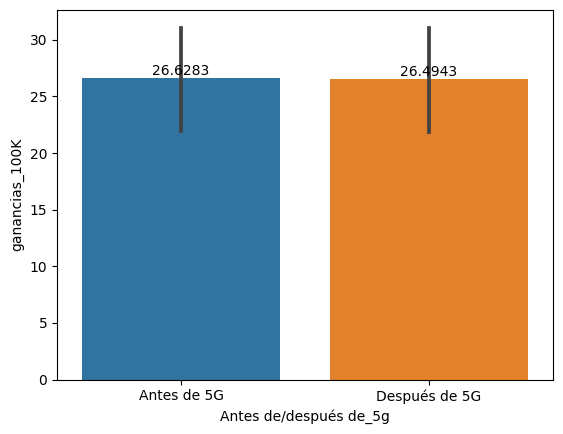

In [32]:
# Este barplot se puede generar directamente con seaborn, sin necesidad de generar agrupaciones
ax = sns.barplot(data = nx_metricas, x = 'Antes de/después de_5g', y = 'ganancias_100K');

# Añadir etiquetas con valores numéricos
for i in ax.containers:
    ax.bar_label(i)

> A nivel global no se aprecia incremento/reducción significativa en las ganancias antes y después del 5G

***barplot ganancias por usuario vs. antes/después***

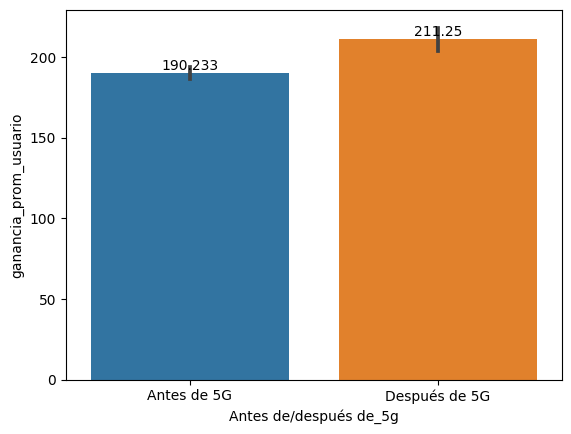

In [33]:
# Generamos esta gráfica de forma muy similar al caso anterior
ax = sns.barplot(data = nx_metricas, x = 'Antes de/después de_5g', y = 'ganancia_prom_usuario');

# Añadir etiquetas con valores numéricos
for i in ax.containers:
    ax.bar_label(i)

> Se observa un incremento en la ganancia promedio generada por cada usuario antes y después del 5G, pasando de 190 libras a 211 libras.

***barplot tasa de abandono vs. antes/después***

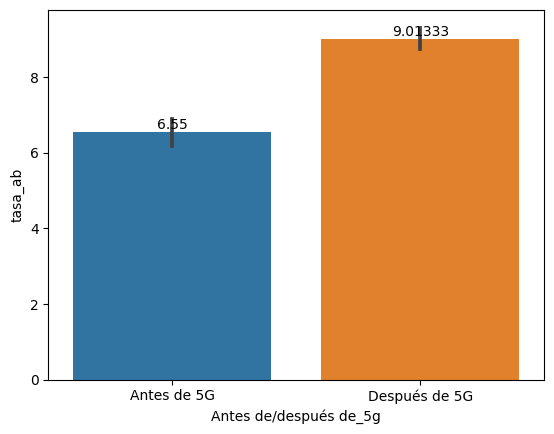

In [34]:
# Generamos la gráfica de manera similar a las anteriores
ax = sns.barplot(data = nx_metricas, x = 'Antes de/después de_5g', y = 'tasa_ab');

# Añadir etiquetas con valores numéricos
for i in ax.containers:
    ax.bar_label(i)

> Hay un incremento en la tasa de abandono antes y después del 5G, pasando del 6.6% al 9.0% respectivamente.

***pointplot variación ganancias vs. meses correspondientes***

En este caso los meses correspondientes son:
- Enero - Junio
- Febrero - Julio
- Marzo - Agosto
- Abril - Septiembre

La idea en este caso es tomar pares de meses correspondientes y calcular la **variación en las ganancias**. Esta variación la podemos calcular como el incremento/reducción porcentual:

$variación = 100*\frac{\text{ganancia_mes_2 - ganancia_mes_1}}{\text{ganancia_mes_1}}$

donde el mes 1 es el mes del primer semestre (enero, febrero, marzo o abril) y mes 2 es el mes correspondiente del segundo semestre (junio, julio, agosto o septiembre).

Así, una variación positiva es una buena noticia (hubo más ganancias durante el segundo mes comparado con el primero).

Para lograr esto podemos crear un *DataFrame* que contenga esta información y luego graficarlo usando *pointplot*:

In [36]:
## Calcular cambios porcentuales

# Agrupar nx_metricas por mes, agregando con la suma de las ganancias (por cada mes calculamos las ganancias totales)
g_mes_100K=nx_metricas.groupby('mes')['ganancias_100K'].sum()
g_mes_100K

mes
Abr    407.19
Ago    419.08
Ene    354.37
Feb    425.69
Jul    412.76
Jun    357.56
Mar    410.45
Sep    400.26
Name: ganancias_100K, dtype: float64

In [37]:
# Listado de meses correspondientes período 1 y período 2
meses1 = ['Ene', 'Feb', 'Mar', 'Abr']
meses2 = ['Jun', 'Jul', 'Ago', 'Sep']

In [39]:
# Crear columna "meses" DataFrame resultante: Ene-Jun, Feb-Jul, Mar-Ago, Abr-Sep
meses = [mes1 + '-' + mes2 for mes1, mes2 in zip(meses1,meses2)]
meses

['Ene-Jun', 'Feb-Jul', 'Mar-Ago', 'Abr-Sep']

In [40]:
# Calcular columna "variaciones"
variaciones = 100*(g_mes_100K[meses2].to_numpy()-g_mes_100K[meses1].to_numpy())/g_mes_100K[meses1].to_numpy()

In [41]:
# Crear dataframe
var_mensual_g = pd.DataFrame.from_dict({'meses': meses, 'variación (%)': variaciones.round(1)})
var_mensual_g

,meses,variación (%)
0,Ene-Jun,0.9
1,Feb-Jul,-3.0
2,Mar-Ago,2.1
3,Abr-Sep,-1.7


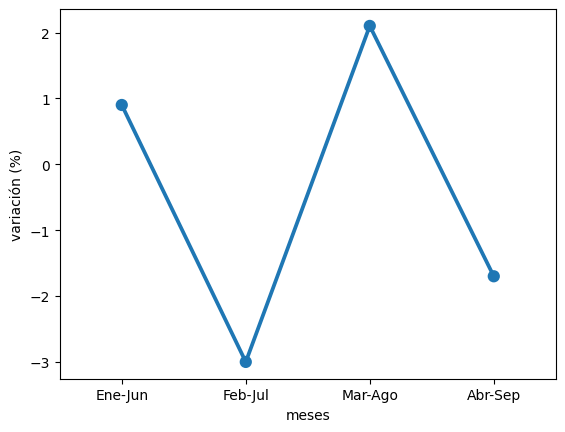

In [42]:
## Generar gráfico "pointplot"
sns.pointplot(data = var_mensual_g, x = 'meses', y='variación (%)');

>No se observa una tendencia clara en la variación porcentual de la ganancia obtenida entre meses correspondientes: en algunos pares de meses hubo incrementos de entre 1 y 2% y en otros una reducción de entre -2 y -3%.

***pointplot ganancias por usuario vs. meses correspondientes***

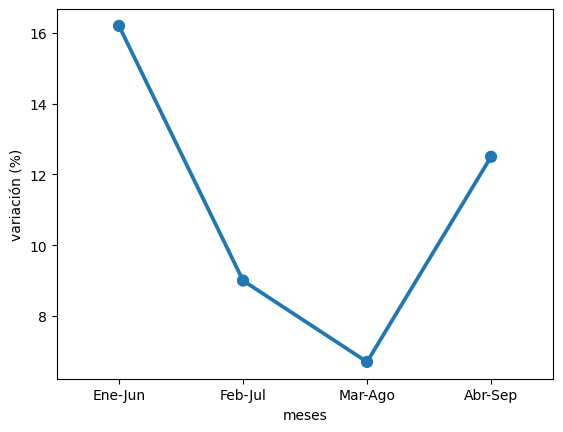

In [43]:
# Podemos usar la misma lógica del caso anterior para generar esta gráfica

# Agrupar nx_metricas por mes, agregando con el promedio de las ganancias por usuario (por cada mes calculamos el
# promedio de las ganancias promedio)
g_mes_user=nx_metricas.groupby('mes')['ganancia_prom_usuario'].mean()

# Calcular columna "variaciones"
variaciones = 100*(g_mes_user[meses2].to_numpy()-g_mes_user[meses1].to_numpy())/g_mes_user[meses1].to_numpy()

# Crear dataframe
var_mensual_g_user = pd.DataFrame.from_dict({'meses': meses, 'variación (%)': variaciones.round(1)})

# pointplot
sns.pointplot(data = var_mensual_g_user, x = 'meses', y='variación (%)');

> Se observa una reducción progresiva en el crecimiento de las ganancias promedio por usuario en los tres primeros grupos de meses, pasando del 16% a menos del 7% de variación. Sin embargo, en Abr-Sep se comienza a ver un repunte con un incremento en la ganancia promedio por usuario de más del 12%.

***pointplot tasa de abandono vs. meses correspondientes***

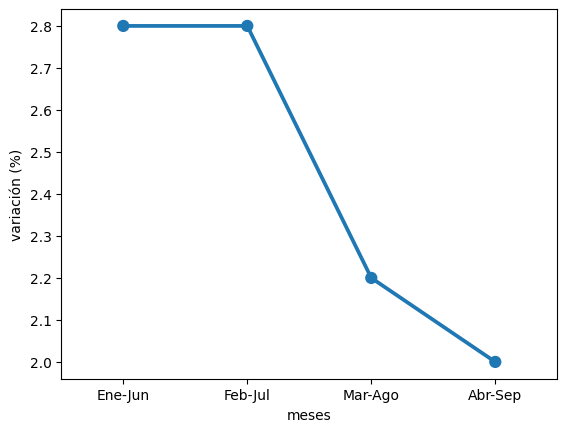

In [44]:
# Y de nuevo usamos una sintaxis similar a las anteriores
# Agrupar nx_metricas por mes, agregando con el promedio de las tasas de abandono (por cada mes calculamos el
# promedio de las tasas de abandono)
tasa_ab_mes=nx_metricas.groupby('mes')['tasa_ab'].mean()

# Calcular columna "variaciones"
variaciones = tasa_ab_mes[meses2].to_numpy()-tasa_ab_mes[meses1].to_numpy()

# Crear dataframe
var_mensual_tasa_ab = pd.DataFrame.from_dict({'meses': meses, 'variación (%)': variaciones.round(1)})

# pointplot
sns.pointplot(data = var_mensual_tasa_ab, x = 'meses', y='variación (%)');

> La variación inter-mensual de la tasa de abandono tiene una clara tendencia a la baja, pasando del 2.8% aprox. en Ene-Jun y Feb-Jul a apenas el 2.0% en Abr-Sep.

***barplot ganancia vs. ciudades + antes/después (color)***

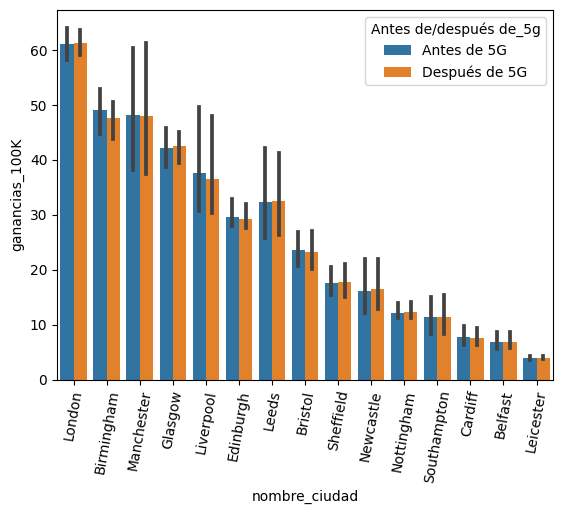

In [45]:
# Esta gráfica la podemos generar directamente con Seaborn
ax = sns.barplot(data = nx_metricas, x = 'nombre_ciudad', y = 'ganancias_100K', hue = 'Antes de/después de_5g');

# Rotar 80° etiquetas del eje x
plt.xticks(rotation=80);

> A nivel de las ciudades no se aprecia incremento/reducción significativa en las ganancias antes y después del 5G, muy similar a lo observado a nivel global

***barplot ganancia por usuario vs. ciudades + antes/después (color)***

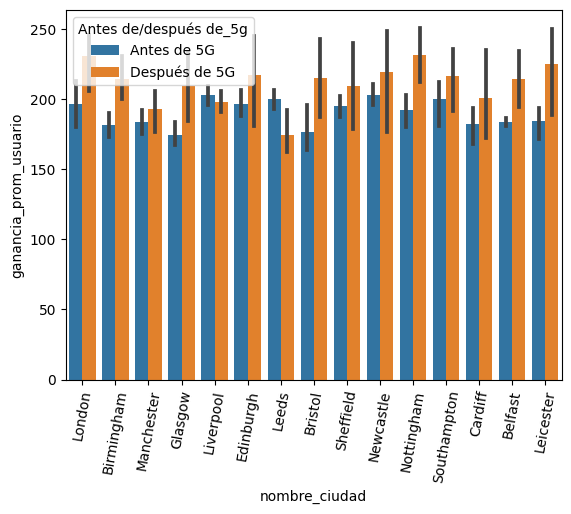

In [46]:
# De nuevo, podemos usar una sintaxis similar a la anterior
ax = sns.barplot(data = nx_metricas, x = 'nombre_ciudad', y = 'ganancia_prom_usuario', hue = 'Antes de/después de_5g');

# Rotar 80° etiquetas del eje x
plt.xticks(rotation=80);

> En 13 de las 15 ciudades se observa un incremento en la ganancia promedio generada por cada usuario. La excepción se da en las ciudades de Liverpool (con una ligera disminución) y Leeds (con una cambio de 200 a 175 libras). En general esta tendencia coincide con lo observado a nivel global.

***barplot tasa de abandono vs. ciudades + antes/después (color)***

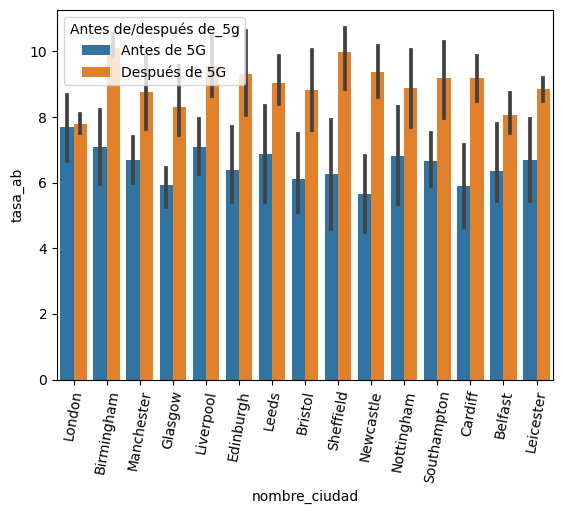

In [47]:
# De nuevo, podemos usar una sintaxis similar a las anteriores
ax = sns.barplot(data = nx_metricas, x = 'nombre_ciudad', y = 'tasa_ab', hue = 'Antes de/después de_5g');

# Rotar 80° etiquetas del eje x
plt.xticks(rotation=80);

> En todas las ciudades se observa un incremento en la tasa de abandono antes y después del 5G, lo cual coincide con la tendencia observada a nivel global.

### 4.2. EDA a partir del *DataFrame*  `info_cm`

En este caso hay columnas que contienen información redundante y que no es necesario considerar, como:

- `fecha`: con el `mes` es suficiente
- `periodo_tiempo`: con el `mes` es suficiente

Además, la columna "vr_total_mercado_1M" tampoco arroja información que nos permita diferenciar una empresa de la otra:

In [48]:
# vr_total_mercado_1M por compañías
info_cm.groupby('compañía')['vr_total_mercado_1M'].sum()

compañía
NexaCom     16607.85
Orange      16607.85
Otras       16607.85
Vodafone    16607.85
VoxLink     16607.85
Name: vr_total_mercado_1M, dtype: float64

Es decir que también podemos descartar esta columna en el análisis.

Con las columnas restantes construimos una tabla similar a la anterior:

|         |                            |                   |              |             |                                                                              |
|:-------:|:--------------------------:|:-----------------:|:------------:|-------------|------------------------------------------------------------------------------|
| **mes** | **Antes de/después de_5g** | **nombre_ciudad** | **compañía** | **cm_pctj** | **análisis**                                                                 |
|         |              ✔︎             |                   |       ✔︎      |      ✔︎      | barplot cambio porcentual vs. compañía antes y después (color)               |
|    ✔︎    |              ✔︎             |                   |       ✔︎      |      ✔︎      | gráfico variación del cambio porcentual vs. compañía antes y después (color) |

Como en este caso tenemos más variables categóricas se podrían generar múltiples gráficas para analizar mes + antes/después + ciudad + compañía junto con la variable numérica para el cambio porcentual, pero el análisis resulta más extenso y sugiero realizarlo con base en el análisis que llevaremos a cabo a continuación.

Realicemos cada uno de los análisis mencionados en la tabla:

***barplot cambio porcentual vs. compañía antes y después (color)***

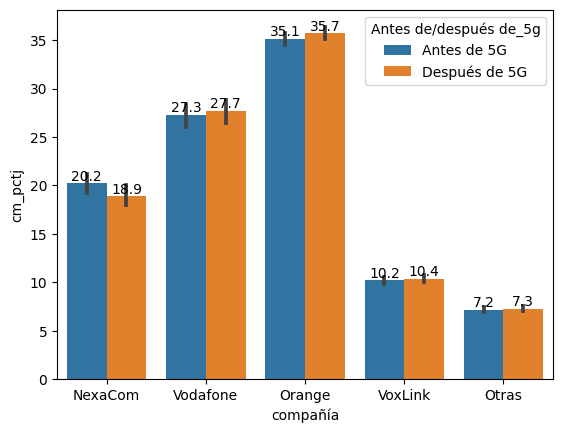

In [49]:
# Podemos generar la gráfica directamente con Seaborn
ax = sns.barplot(data = info_cm, x = 'compañía', y = 'cm_pctj', hue = 'Antes de/después de_5g')

# Añadir etiquetas con valores numéricos
for i in ax.containers:
    ax.bar_label(i, fmt='%.1f')

> Todos los demás competidores muestran ligeros incrementos en el porcentaje de participación del mercado antes y después del 5G respectivamente. Sin embargo, nuestra compañía es la única que muestra una ligera reducción en dicho porcentaje de participación, pasando de un poco más del 20% antes a un poco menos del 19%.

***gráfico variación del cambio porcentual vs. compañía antes y después (color)***

Acá debemos primero calcular el cambio porcentual en el porcentaje de participación en el mercado entre meses correspondientes. Para ello podemos simplemente calcular la diferencia entre dichos porcentajes entre el mes 2 (después del 5G) y el mes 1 (antes del 5G):

In [50]:
# Agrupar info_cm por mes, promediando los porcentajes de participación en el mercado
mean_cm_pctj=info_cm.groupby('mes')['cm_pctj'].mean()

# Calcular "variaciones"
variaciones = mean_cm_pctj[meses2].to_numpy() - mean_cm_pctj[meses1].to_numpy()

# Crear dataframe
var_mensual_mean_cm_pctj = pd.DataFrame.from_dict({'meses': meses, 'variación (%)': variaciones})
var_mensual_mean_cm_pctj

,meses,variación (%)
0,Ene-Jun,0.000933
1,Feb-Jul,-0.000133
2,Mar-Ago,0.000000
3,Abr-Sep,-0.000400


Realmente estas variaciones entre meses correspondientes son mínimas y no es necesario generar la gráfica correspondiente. Simplemente dejemos esto como una observación:

> No se observan cambios apreciables en el porcentaje de participación en el mercado entre meses correspondientes, debidos a la implementación del 5G.

### 4.3. EDA a partir del *DataFrame*  `info_gplan`

En este caso hay columnas que contienen información redundante y que no es necesario considerar, como:

- `fecha`: con el `mes` es suficiente
- `periodo_tiempo`: con el `mes` es suficiente

Para las columnas restantes haremos una tabla donde marcaremos las columnas de interés para cada análisis:

|         |                            |                   |            |                    |                                                                                          |
|:-------:|:--------------------------:|:-----------------:|:----------:|--------------------|------------------------------------------------------------------------------------------|
| **mes** | **Antes de/después de_5g** | **nombre_ciudad** | **planes** | **ganancias_plan_100K** | **análisis**                                                                             |
|         |              ✔︎             |                   |      ✔︎     |          ✔︎         | barplot ganancias vs. plan antes y después (color)                                       |
|    ✔︎    |              ✔︎             |                   |      ✔︎     |          ✔︎         | pointplots variación de las ganancias vs. plan antes y después (1 gráfico por cada plan) |

Podríamos adicionalmente analizar mes + antes/después + planes + ganancias e incluso añadir las ciudades. Pero en este caso se requieren múltiples gráficas (una por cada combinación) y esto extiende el análisis. Sugiero realizarlo con base en el análisis que llevaremos a cabo a continuación.

***barplot ganancias vs. plan antes y después (color)***

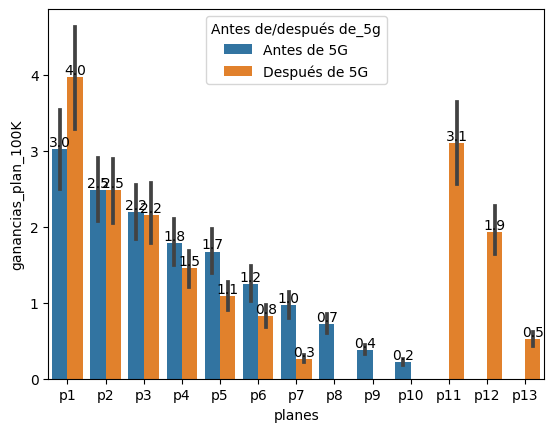

In [51]:
# Podemos directamente usar Seaborn
ax = sns.barplot(data = info_gplan, x = 'planes', y = 'ganancias_plan_100K', hue = 'Antes de/después de_5g')

# Añadir etiquetas con valores numéricos
for i in ax.containers:
    ax.bar_label(i, fmt='%.1f')

A partir de la gráfica vemos que algunos planes existentes antes del 5G desaparecieron después del 5G (p8, p9, p10) y que planes como p11, p2 y p13 no fueron creados sólo después del 5G.

Entonces debemos cambiar el análisis. Por tanto:

1. Analizaremos las ganancias totales antes y después del 5G, sin discriminar por plan
2. Analizaremos el comportamiento de los planes que permanecen después del 5G (planes 1 al 7)
3. Analizaremos el porcentaje de las ganancias que los nuevos planes (p11 a p13) representan del total de planes existentes después del 5G

***Ganancias totales antes y después del 5G sin discriminar por plan***

In [52]:
info_gplan.groupby(['Antes de/después de_5g'])['ganancias_plan_100K'].sum()

Antes de/después de_5g
Antes de 5G       882.37
Después de 5G    1068.38
Name: ganancias_plan_100K, dtype: float64

> Las ganancias totales asociadas a los planes pasaron de 8.823'700.000 libras antes del 5G a 10.683'800.000, es decir hubo un incremento del 21% en las ganancias asociadas a los planes.

***Comportamiento de los planes que permanecen después del 5G (planes 1 al 7)***

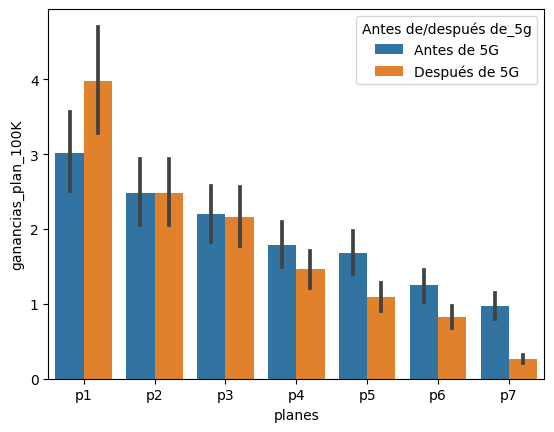

In [53]:
# Eliminar los planes p8 al p13
eliminar = ['p8', 'p9', 'p10', 'p11', 'p12', 'p13']
info_gplan_mod = info_gplan[~info_gplan['planes'].isin(eliminar)]

# Y generar la gráfica para los planes que estamos preservando
ax = sns.barplot(data = info_gplan_mod, x = 'planes', y = 'ganancias_plan_100K', hue = 'Antes de/después de_5g')

In [55]:
# Calculemos las variaciones porcentuales en las ganancias de cada plan antes y después

# Generar agrupaciones por antes/después y por plan
grupos = info_gplan_mod.groupby(['Antes de/después de_5g','planes'])['ganancias_plan_100K'].sum()
grupos

Antes de/después de_5g  planes
Antes de 5G             p1        181.27
                        p2        148.80
                        p3        131.93
                        p4        107.54
                        p5        100.46
                        p6         74.91
                        p7         58.24
Después de 5G           p1        238.66
                        p2        148.73
                        p3        129.61
                        p4         87.68
                        p5         65.15
                        p6         49.46
                        p7         15.56
Name: ganancias_plan_100K, dtype: float64

In [56]:
# Calcular variaciones porcentuales después vs. antes
variaciones = 100*(grupos['Después de 5G'].to_numpy()-grupos['Antes de 5G'].to_numpy())/grupos['Antes de 5G'].to_numpy()
variaciones = variaciones.round(2)
variaciones

array([ 3.166e+01, -5.000e-02, -1.760e+00, -1.847e+01, -3.515e+01,
       -3.397e+01, -7.328e+01])

In [57]:
# Listado de planes
planes = info_gplan_mod['planes'].unique()

# Crear dataframe con planes y variaciones
var_planes = pd.DataFrame({'plan': planes, 'variación (%)': variaciones})
var_planes

,plan,variación (%)
0,p1,31.66
1,p2,-0.05
2,p3,-1.76
3,p4,-18.47
4,p5,-35.15
5,p6,-33.97
6,p7,-73.28


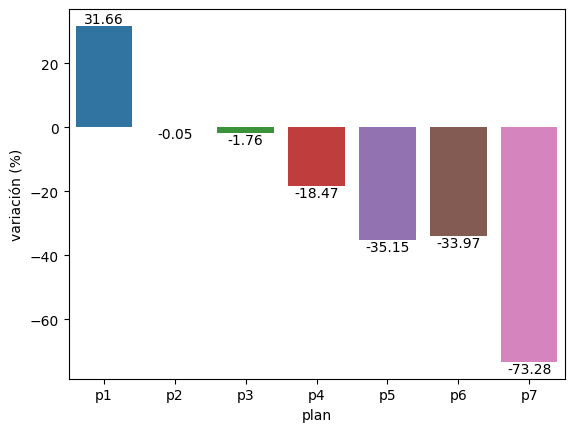

In [59]:
# Y generar gráfico barplot
ax = sns.barplot(data=var_planes, x = 'plan', y = 'variación (%)');

# Añadir etiquetas con valores numéricos
for i in ax.containers:
    ax.bar_label(i)

> La mayoría de los planes (p2 al p7) generaron reducciones en las ganancias después del 5G, con variaciones entre el -0.05% y el -73.28% (p7, el de mayor reducción). Sin embargo, el p1 generó un incremento en las ganancias de casi el 32%.

***Porcentaje de las ganancias que los nuevos planes (p11 a p13) representan del total de planes existentes después del 5G***

In [60]:
# Ganancias totales después del 5G
ganancias_desp = info_gplan.groupby('Antes de/después de_5g')['ganancias_plan_100K'].sum()['Después de 5G']
ganancias_desp

1068.38

In [62]:
# Eliminar todos los planes exceptuando p11 a p13
info_planes_nuevos = info_gplan[info_gplan['planes'].isin(['p11', 'p12', 'p13'])]
info_planes_nuevos

,fecha,mes,Antes de/después de_5g,periodo_tiempo,nombre_ciudad,planes,ganancias_plan_100K
1020,01-Jun-22,Jun,Después de 5G,1,London,p11,7.24
1021,01-Jun-22,Jun,Después de 5G,1,London,p12,4.40
1022,01-Jun-22,Jun,Después de 5G,1,London,p13,1.29
1023,01-Jun-22,Jun,Después de 5G,1,Birmingham,p11,4.42
1024,01-Jun-22,Jun,Después de 5G,1,Birmingham,p12,2.94
...,...,...,...,...,...,...,...
1195,01-Sep-22,Sep,Después de 5G,4,Belfast,p12,0.43
1196,01-Sep-22,Sep,Después de 5G,4,Belfast,p13,0.09
1197,01-Sep-22,Sep,Después de 5G,4,Leicester,p11,0.48
1198,01-Sep-22,Sep,Después de 5G,4,Leicester,p12,0.29


In [63]:
# Y calcular la ganancia debida a estos planes
ganancias_planes_nuevos = info_planes_nuevos['ganancias_plan_100K'].sum()
ganancias_planes_nuevos

333.53

In [64]:
# Y finalmente calcular el porcentaje que estos nuevos planes representan de las ganancias totales después del 5G
100*ganancias_planes_nuevos/ganancias_desp

31.218293116681327

> Los nuevos planes (p11, p12 y p13) representan un 31% de las ganancias totales asociadas a los planes disponibles y obtenidas después de la implementación del 5G.

<a id='sec_5'></a>
## 5. Reporte final y recomendaciones

Para este apartado lo que haremos será tomar todas las observaciones anteriores, sintetizarlas en breves conclusiones y luego generar el listado correspondiente de recomendaciones (si aplica).

Agrupemos estas conclusiones por cada análisis realizado:

### 5.1. Reporte final

**Conclusiones análisis de ganancias, ganancias promedio por usuario y tasa de abandono**

- No hay cambios notables en las ganancias antes y después de la implementación del 5G ni a nivel global ni a nivel de las ciudades.
- Hubo un incremento en las ganancias promedio generadas por cada usuario antes y después del 5G tanto a nivel global como de ciudades, con un incremento porcentual del 11% a nivel global.
- La tasa de abandono pasó del 6.6% antes del 5G al 9.0% después del 5G. Sin embargo, si se analizan las variaciones intermensuales (Ene-Jun, Feb-Jul, Mar-Ago, Abr-Sep) hay una tendencia a la baja, con variaciones del 2.8% en los períodos Ene-Jun y Feb-Jul a un 2.0% en Abr-Sep.

**Conclusiones análisis de cuota de mercado**

- Las variaciones en el porcentaje de participación en el mercado antes y después del 5G son mínimas. Nuestros competidores muestran un ligero incremento en este porcentaje, del orden del 1 al 2%, mientras que nuestra empresa una ligera reducción del 1%.

**Conclusiones análisis de planes individuales**
- A pesar de que los planes p2 al p7 presentaron reducciones en el nivel de ganancia antes y después del 5G, el repunte del plan p1 (con un incremento del 32%) y los nuevos planes introducidos por la empresa (planes p11, p12, p13) hicieron que en términos globales las ganancias asociadas a los planes se incrementaran en un 21%.

**Conclusión general**

Al comparar las diferentes métricas antes y después de la implementación del 5G observamos que:

- Se mantuvieron las ganancias y el porcentaje de participación en la cuota de mercado y hubo incluso un incremento en las ganancias promedio generadas por cada usuario antes de la implementación, posiblemente debidas a la introducción de nuevos planes (p11, p12 y p13) y al repunte del plan "p1".
- Hubo un ligero incremento en la tasa de abandono y reducción en las ganancias generadas por los planes p2 al p7.

### 5.2. Recomendaciones

- Se debe continuar monitoreando la tasa de abandono que, a pesar de tener un incremento inter-mensual, tiene una tendencia a la baja.
- Los planes p2 al p7 deben ser re-evaluados pues están generando reducciones en el nivel de ganancia después de la implementación del 5G
- Se deben mantener el plan p1 y los nuevos planes p11, p12 y p13 y considerar la opción de crear nuevos planes similares a estos últimos 3 con el fin de incrementar las ganancias a corto plazo.

<a id='sec_6'></a>
## 6. Sugerencias finales

- Se podría incluir un análisis estadístico para determinar si las métricas antes y después tienen cambios estadísticamente significativos.
- Se sugiere complementar el análisis combinando múltiples variables (como meses + antes/después + ciudades + variable numérica) usando múltiples gráficas.